# STEP 1: Set up your analysis

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Import packages</div></div><div class="callout-body-container callout-body"><p>Add imports for packages that help you:</p>
<ol type="1">
<li>Work with the file system interoperably</li>
<li>Work with vector data</li>
<li>Create interactive plots of vector data</li>
</ol></div></div>

In [1]:
# Interoperable file paths
import os
# Find the home folder
import pathlib
# Work with vector data
import geopandas as gpd
# Interactive plots of vector data
import hvplot.pandas

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Prepare data directory</div></div><div class="callout-body-container callout-body"><p>In the cell below, <strong>reproducibly and interoperably</strong>
define and create a project data directory somewhere in your home
folder. Be careful not to save data files to your <code>git</code>
repository!</p></div></div>

In [2]:
# Define and create the project data directory
data_dir = os.path.join(
    pathlib.Path.home(),
    'earth-analytics',
    'data',
    'redlining'
)
os.makedirs(data_dir, exist_ok=True)

## STEP 2: Site map

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Define your study area</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Copy the <strong>geopackage</strong> URL for the <a
href="https://dsl.richmond.edu/panorama/redlining/data">University of
Richmond</a></li>
<li>Load the <em>vector</em> data into Python, making sure to cache the
download so you don’t have to run it multiple times.</li>
<li>Create a quick plot to check the data</li>
</ol></div></div>

<AxesSubplot:>

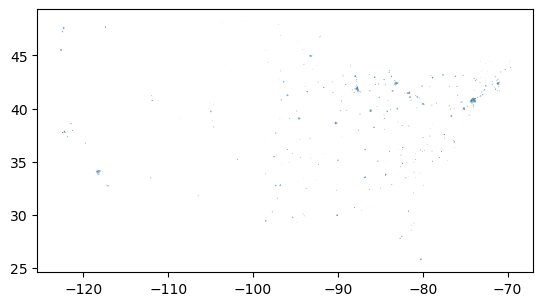

In [3]:
# Define info for redlining download
redlining_url = ("https://dsl.richmond.edu/panorama/"
                 "redlining/static/mappinginequality.gpkg")

redlining_dir = os.path.join(data_dir, 'redlining')
os.makedirs(redlining_dir, exist_ok=True)
redlining_path = os.path.join(redlining_dir, 'redlining.shp')

# Only download once
if not os.path.exists(redlining_path):
    redlining_gdf = gpd.read_file(redlining_url)
    redlining_gdf.to_file(redlining_path)

# Load from file
redlining_gdf = gpd.read_file(redlining_path)

# Check the data
redlining_gdf.plot()

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Create an interactive site map</div></div><div class="callout-body-container callout-body"><p>In the cell below:</p>
<ol type="1">
<li>Select only the data where the <code>city</code> column is equal to
<code>"Denver"</code>.</li>
<li>For now, dissolve the regions with the <code>.dissolve()</code>
method so we see only a map of Denver.</li>
<li>Plot the data with the <code>EsriImagery</code> tile source basemap.
Make sure we can see your basemap underneath!</li>
</ol></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond: Write a site description</div></div><div class="callout-body-container callout-body"><p>Your site description should address:</p>
<ol type="1">
<li>Is there anything relevant to this analysis that you notice in your
site map?</li>
<li>Research about the <strong>context</strong> of this analysis. You
could include information about the climate and history of the Denver
area. How might racism, water rights, or other societal forces have
influenced the distribution of urban green space in Denver? Aim for a
paragraph of text.</li>
<li>Citations for the site data and your context sources.</li>
</ol></div></div>

In [4]:
# Create an interactive map of Denver redlining boundary

# Select out Denver, CO from redlining_gdf 
denver_redlining_gdf = redlining_gdf[redlining_gdf.city=='Denver']
denver_redlining_gdf

# Plot undissolved denver_redlining_gdf with pandas
#denver_redlining_gdf.plot(column='category', legend=True)

# Dissolve into a single polygon
denver_dissolved = denver_redlining_gdf.dissolve()

# Make interactive plot using hvplot
denver_redlining_gdf.hvplot(geo=True,
                        tiles='EsriImagery',
                        line_color='white',
                        fill_color='None',
                        line_width=3,
                        frame_width=600,
                        title='City of Denver and \nRedlining boundaries (1940)')

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

YOUR SITE DESCRIPTION HERE

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Store variables</div></div><div class="callout-body-container callout-body"><p>Store any variables you want for later. This should definitely
include your un-dissolved denver redlining <code>GeoDataFrame</code> and
your data directory path.</p></div></div>

In [5]:
%store denver_redlining_gdf data_dir

Stored 'denver_redlining_gdf' (GeoDataFrame)
Stored 'data_dir' (str)


In [2]:
%%capture
%%bash
jupyter nbconvert redlining-31-site-map.ipynb --to html